In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\Lenovo\anaconda3\envs\excondables\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### Read the data / Review all three datasets 

In [4]:
# 1) dataset used to build a model that can predict the quality of a batch of cookies
cookies = pd.read_csv('/Users/Lenovo/Desktop/cookies.csv')

In [5]:
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,peanut butter,1.36,3
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,raisins,1.80,3
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,"chocolate, oats",1.07,3
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,chocolate,1.77,3


In [6]:
# 2) dataset without the label of cookies quality - this is used to predict the label quality
cookies_validate = pd.read_csv('/Users/Lenovo/Desktop/cookies_validate.csv')
cookies_validate

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,14,0.62,19.25,400.0,41.0,172.0,1.00020,7.98,0.67,9.7,0,melted,16.6,7,"nuts, chocolate",1.85,3
1,26,0.35,1.00,520.0,35.0,146.0,0.99300,8.45,0.44,10.0,0,melted,13.8,7,chocolate,1.43,3
2,30,0.39,10.40,440.0,20.0,142.0,0.99740,8.20,0.53,10.0,0,melted,17.0,7,chocolate,1.57,3
3,52,0.33,1.10,570.0,21.0,82.0,0.99100,8.32,0.46,10.9,0,melted,12.4,7,"chocolate, oats",1.44,3
4,100,0.37,13.50,600.0,52.0,192.0,0.99750,8.00,0.44,9.1,0,melted,14.8,7,chocolate,1.51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1442,0.02,1.90,780.0,18.0,30.0,0.99712,8.40,0.75,9.8,0,cubed,13.8,7,"nuts, oats, chocolate",1.01,3
775,1445,0.19,5.20,940.0,19.0,98.0,0.99713,8.16,0.52,9.6,0,cubed,14.8,7,"nuts, oats",1.68,3
776,1461,0.00,2.10,600.0,6.0,13.0,0.99664,8.59,0.61,10.0,0,cubed,12.4,7,"nuts, oats",1.38,3
777,1467,0.08,2.30,670.0,19.0,32.0,0.99648,8.52,0.57,11.0,0,cubed,13.4,7,peanut butter,1.63,3


In [7]:
# 3) dataset with the real quality label of the validate set. 
# This data is used to calculate the accuracy of any model run
cookies_test = pd.read_csv('/Users/Lenovo/Desktop/cookies_test.csv')
cookies_test

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,14,0.62,19.25,400.0,41.0,172.0,1.00020,7.98,0.67,9.7,7,melted,16.6,7,"nuts, chocolate",1.85,3
1,26,0.35,1.00,520.0,35.0,146.0,0.99300,8.45,0.44,10.0,8,melted,13.8,7,chocolate,1.43,3
2,30,0.39,10.40,440.0,20.0,142.0,0.99740,8.20,0.53,10.0,8,melted,17.0,7,chocolate,1.57,3
3,52,0.33,1.10,570.0,21.0,82.0,0.99100,8.32,0.46,10.9,9,melted,12.4,7,"chocolate, oats",1.44,3
4,100,0.37,13.50,600.0,52.0,192.0,0.99750,8.00,0.44,9.1,7,melted,14.8,7,chocolate,1.51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1442,0.02,1.90,780.0,18.0,30.0,0.99712,8.40,0.75,9.8,5,cubed,13.8,7,"nuts, oats, chocolate",1.01,3
775,1445,0.19,5.20,940.0,19.0,98.0,0.99713,8.16,0.52,9.6,6,cubed,14.8,7,"nuts, oats",1.68,3
776,1461,0.00,2.10,600.0,6.0,13.0,0.99664,8.59,0.61,10.0,4,cubed,12.4,7,"nuts, oats",1.38,3
777,1467,0.08,2.30,670.0,19.0,32.0,0.99648,8.52,0.57,11.0,4,cubed,13.4,7,peanut butter,1.63,3


### Exploratory Data Analysis and Descriptive Statistics

In [8]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [9]:
#checking for summ of null values: 
#dataset looks pretty clean, only with few null values which can be dropped later.
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

## Bake time 

In [10]:
cookies['bake time'].describe() # exploring 'bake time' 

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

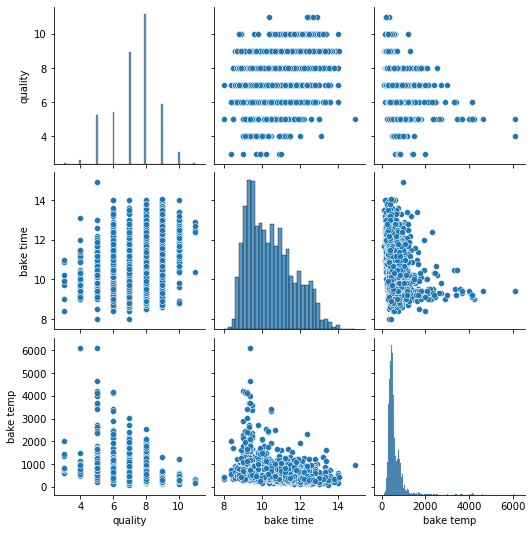

In [11]:
# comparing 'quality', 'bake time', 'bake temp' with each other, via pairplot 
# as we can see, longer bake time is, better qualtiy 
sns.pairplot(cookies[['quality', 'bake time', 'bake temp']])

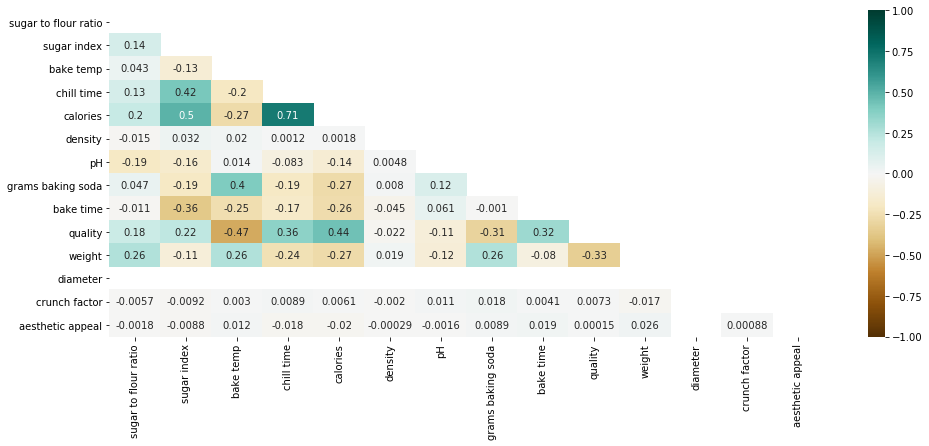

In [12]:
# checking for multicollinearity among variables. 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [13]:
# checking for correlation among variables:
# calories has the highest score, after the target, but it is not very high, so it could be kept. 
num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))

sugar to flour ratio --> 0.18213460597745224
sugar index --> 0.22065352244335387
bake temp --> -0.47050370901242416
chill time --> 0.36465303504313296
calories --> 0.4398363987447588
density --> -0.021995308762374956
pH --> -0.11472101703648831
grams baking soda --> -0.30534038308979605
bake time --> 0.3153070710526115
quality --> 1.0
weight --> -0.3282994017266423
diameter --> nan
crunch factor --> 0.007262050440050089
aesthetic appeal --> 0.00015142266125493597


## butter

In [14]:
# checking for different value counts in 'butter type'
cookies['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

## aesthetic appeal

In [15]:
# checking for values in 'aesthetic appeal'
# most of valaues to 3, probably out of 4. 
cookies['aesthetic appeal'].value_counts()

3    5195
4       3
Name: aesthetic appeal, dtype: int64

Thoughts on aesthetics : 
    not many values - drop column 

## weight

In [16]:
# looking at weight, we can see there is an outlier (min, -99) compared to the rest of parameters 
cookies['weight'].describe()

count    5198.000000
mean       14.381935
std         3.023740
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [17]:
# we can see it in detailed, by exploring the values further
cookies['weight'].unique()

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        12.8,  13. ,  14. ,  12. ,  14.6,  15.6,  13.4,  16.8,  14.8,
        13.6,  16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,
        10.4,  11.8,  11.6,  15.4,  21.6,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

Thoughts on weight : 

    Remove -99 value

## diameter

In [18]:
# checking values of 'diameter'
# we can see all cookies have diameter of 7 (cm?)
cookies['diameter'].unique()

array([7], dtype=int64)

Thoughts on diameter : 

    All equal to 7 - column can be dropped 

## bake time

In [19]:
# checking 'bake time' column 
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [20]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

Thoughts on Bake time 

    judging by the spread of nulls across quality bands, any missing values could be replaced by mean or rows dropped 

## crunch factor

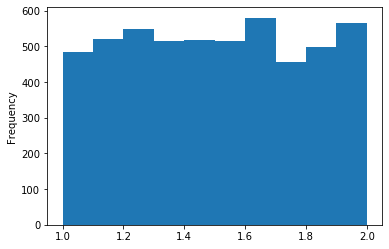

In [21]:
# checking 'crunch factor'
# seems like a normal distirbution 
cookies['crunch factor'].plot.hist()

## mixins

In [22]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [23]:
cookies['mixins']

0                     raisins
1                     raisins
2             nuts, chocolate
3                   chocolate
4       nuts, oats, chocolate
                ...          
5193            peanut butter
5194                  raisins
5195          chocolate, oats
5196                chocolate
5197                chocolate
Name: mixins, Length: 5198, dtype: object

In [24]:
# checking for values in 'mixins'
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [25]:
# 13 different (tastes or flavors) for all cookies
cookies['mixins'].nunique()

13

### Wrangling the data / making small changes 

In [26]:
# we can drop "aesthetic appeal", "diameter" columns since they are not very related to the target
cookies.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [27]:
cookies=cookies.dropna(subset=['mixins'])

In [28]:
# we need to reset index after column drops, to have an updated index 
cookies.reset_index(drop=True, inplace=True)

In [29]:
# adding more columns to df, based on mixin values 
cookies['chocolate'] = 0
cookies['raisins'] = 0
cookies['oats'] = 0
cookies['nuts'] = 0
cookies['peanut butter'] = 0

<ipython-input-29-b1b011725339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookies['chocolate'] = 0
<ipython-input-29-b1b011725339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookies['raisins'] = 0
<ipython-input-29-b1b011725339>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [30]:
# lets see if the new columns are added 
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,0,0,0,0


In [31]:
# 'assining' value to new columns 
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies)):
        if mix in [x.strip() for x in cookies.loc[i, 'mixins'].split(',')]:
            cookies.loc[i, mix] = 1

C:\Users\Lenovo\anaconda3\envs\excondables\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
# now we can drop 'mixins' column 
cookies.drop(columns=["mixins"], inplace=True)

C:\Users\Lenovo\anaconda3\envs\excondables\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


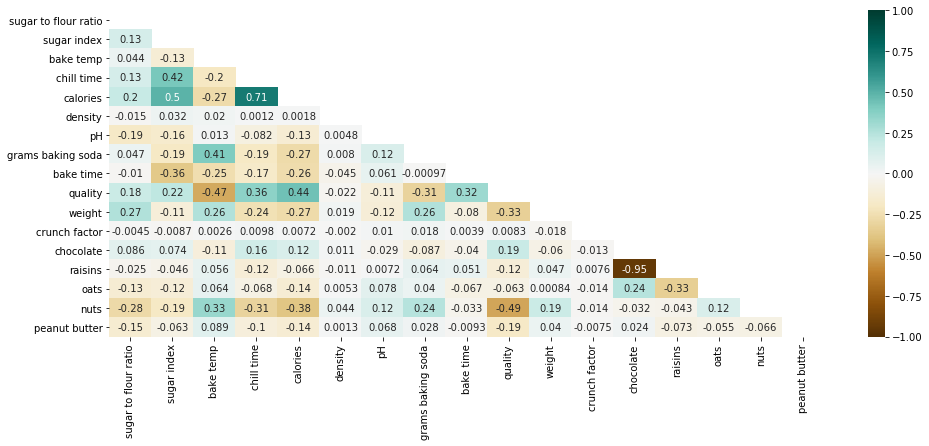

In [33]:
# lets check for multicollinearity in the updated df 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

- no high score of vairables which could cause multicollinearity


### pre processing- drop NANs and deal with non numerical data


In [34]:
# checking data types 
cookies.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
crunch factor           float64
chocolate                 int64
raisins                   int64
oats                      int64
nuts                      int64
peanut butter             int64
dtype: object

In [35]:
# all columns are numeric, except 'butter type'. Lets convert it to numeric via getdummies 
cookies=pd.get_dummies(cookies, columns=['butter type'])

In [36]:
# checking for NAN values
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5196 non-null   float64
 1   sugar index           5191 non-null   float64
 2   bake temp             5196 non-null   int64  
 3   chill time            5196 non-null   float64
 4   calories              5196 non-null   float64
 5   density               5196 non-null   float64
 6   pH                    5196 non-null   float64
 7   grams baking soda     5196 non-null   float64
 8   bake time             5186 non-null   float64
 9   quality               5196 non-null   int64  
 10  weight                5196 non-null   float64
 11  crunch factor         5196 non-null   float64
 12  chocolate             5196 non-null   int64  
 13  raisins               5196 non-null   int64  
 14  oats                  5196 non-null   int64  
 15  nuts                 

In [37]:
# we can see 'sugar index' has few NANs, lets drop them
cookies = cookies.dropna(inplace=True)

In [38]:
# lets reset the index again
cookies.reset_index(drop=True, inplace=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

### Split data into dependent and independent variables 

In [ ]:
#  now we can drop target variable ('quality')
X= cookies.drop(columns="quality")
y=cookies.quality

### Preprocessing - scaling 

In [ ]:
# import library for pre-processing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [ ]:
# divide the data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.1, random_state=40)


### get model, fit, make predictions  AND evaluate

In [ ]:
# import model 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# apply train-test to the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
predictions  = lm.predict(X_test)

In [ ]:
predictions

In [ ]:
r2_score(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(mse)

In [ ]:
import math 
rmse = math.sqrt(mse)
print(rmse)

### Make predictions on the cookies_validate dataset (without labels)

In [ ]:
# get the date 
cookies_val = pd.read_csv('/Users/Lenovo/Desktop/cookies_validate.csv')

In [ ]:
# check for Nulls/NANs
cookies_val.info()

In [ ]:
# drop "aesthetic appeal", "diameter" columns 
cookies_val.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [ ]:
# adding new columns to df 
cookies_val['chocolate'] = 0
cookies_val['raisins'] = 0
cookies_val['oats'] = 0
cookies_val['nuts'] = 0
cookies_val['peanut butter'] = 0

In [ ]:
# assigning mixin values into new columns
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies_val)):
        if mix in [x.strip() for x in cookies_val.loc[i, 'mixins'].split(',')]:
            cookies_val.loc[i, mix] = 1
            
# drop mixins column 
cookies_val.drop(columns=["mixins"], inplace=True)

In [ ]:
# drop 'id' column
cookies_val.drop(columns= 'id', inplace=True)

In [ ]:
# convert data type (from object) to num for 'butter type' column 
cookies_val=pd.get_dummies(cookies_val, columns=['butter type'])

In [ ]:
# check for NaNs-null values 
cookies_val.info()

In [ ]:
# drop target variable 
X_val = cookies_val.drop(columns="quality")

In [ ]:
# Preprocess numeric values
X_val_scaled = scaler.fit_transform(X_val)

In [ ]:
predictions_val=lm.predict(X_val_scaled)

In [ ]:
predictions_val

### assess predictions against the test data (with labels)

In [ ]:
# get third dataset 
ookies_test = pd.read_csv('/Users/Lenovo/Desktop/cookies_test.csv')

In [ ]:
y_real = cookies_test["quality"]

In [ ]:
y_real.describe()

In [ ]:
mean_squared_error(y_real, predictions_val, squared = False)

### Can we get more accuracy with an ensemble method?

#### Task 4 : Add a random forest regressor model to try to get a more accurate score. 

You can follow https://www.geeksforgeeks.org/random-forest-regression-in-python/
or the sklearn_documentation https://scikit-learn.org/stable/search.html?q=random+forest
to import the regressor and fit it to your data, before running the cells below which will calculate your new RMSE accuracy score

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X.reshape(-1,1), y.reshape(-1,1))

In [ ]:
# test the output by changing values
y = regressor.predict(np.array([6.5]).reshape()  


In [ ]:
#Task 4 your code: 

In [ ]:
#Task 4 your code: 

### Evaluate random forest accuracy 

RMSE accuracy Score - depending on what you named your model and predictions this code may need to be adapted

ie if your model is called 'new model' and you have created a prediction from this model 'predictions_new' then edit the code block below as: 
    
    mean_squared_error(y_real, predictions_new, squared = False)
    

In [ ]:
#EDIT as appropriate to get your RMSE 

mean_squared_error(y_real, predictions_val, squared = False)